In [1]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import database as db
from scripts import notebook_utils as nu

In [2]:
connection = db.get_connection()

In [3]:
cursor = connection.cursor()

In [4]:
sql = 'SELECT payment_method, count(*) as total FROM transactions group by payment_method'

In [5]:
cursor.execute(sql)
data = cursor.fetchall()

In [6]:
labels,values = nu.get_labels_and_values(data)

<BarContainer object of 2 artists>

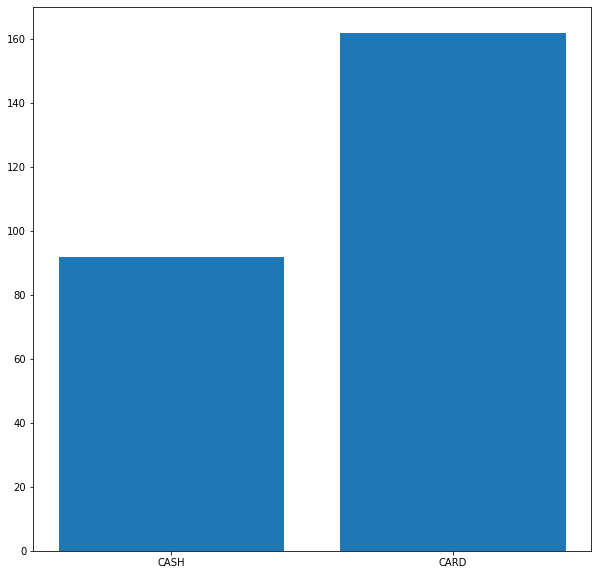

In [7]:
plt.figure(figsize=(10,10))
plt.bar(labels, values)

([<matplotlib.patches.Wedge at 0x1115c29e0>,
 [Text(0.4614521624335484, 0.9985298702519632, 'CASH'),
  Text(-0.46145216243354853, -0.998529870251963, 'CARD')])

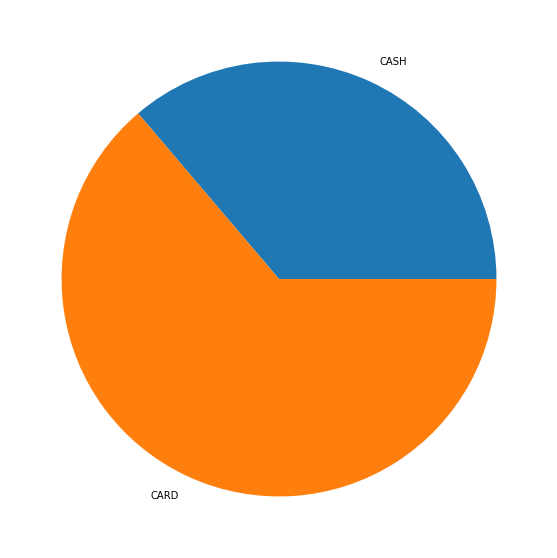

In [8]:
plt.figure(figsize=(10,10))
plt.pie(values,labels=labels)

In [10]:
sql = "SELECT product_id, count(*) as total FROM basket GROUP BY product_id"
cursor.execute(sql)
data = cursor.fetchall()
labels,values = nu.get_labels_and_values(data)

([<matplotlib.patches.Wedge at 0x112a88a60>,
 [Text(1.0466516822909422, 0.33840841590826454, '11458'),
  Text(0.704585858363424, 0.8447240781428438, '11459'),
  Text(0.16083091267269167, 1.088178945545662, '11468'),
  Text(-0.43010194876512087, 1.0124289178349488, '11469'),
  Text(-0.8531372169572783, 0.6943751788783857, '11482'),
  Text(-1.0657566401390683, 0.2723284487516579, '11483'),
  Text(-1.0776201745879574, -0.22075950561871663, '11492'),
  Text(-0.8152127628248054, -0.7385310767513766, '11493'),
  Text(-0.37096802223726555, -1.0355591371222466, '11494'),
  Text(0.16083101455535667, -1.0881789304875806, '11495'),
  Text(0.7086417441192105, -0.8413244787189325, '11496'),
  Text(1.0514267817750587, -0.32326726182238674, '11497')])

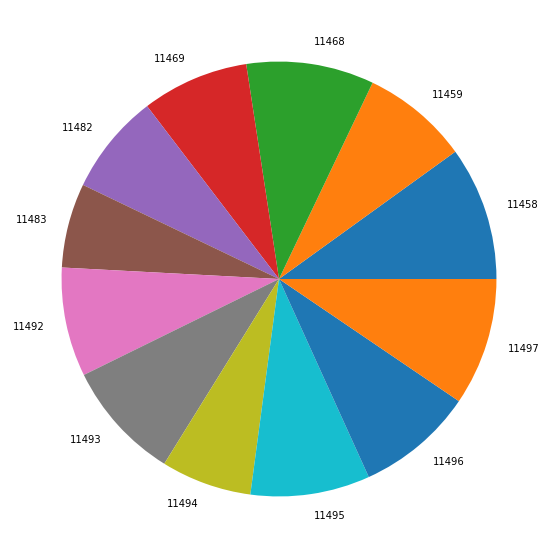

In [11]:
plt.figure(figsize=(10,10))
plt.pie(values,labels=labels)

AttributeError: module 'scripts.notebook_utils' has no attribute 'get_card_vs_cash'

([<matplotlib.patches.Wedge at 0x1156bba90>,
 [Text(-0.037662052785842656, 1.0993550699296186, 'cash'),
  Text(0.03766215571489261, -1.099355066403438, 'card')])

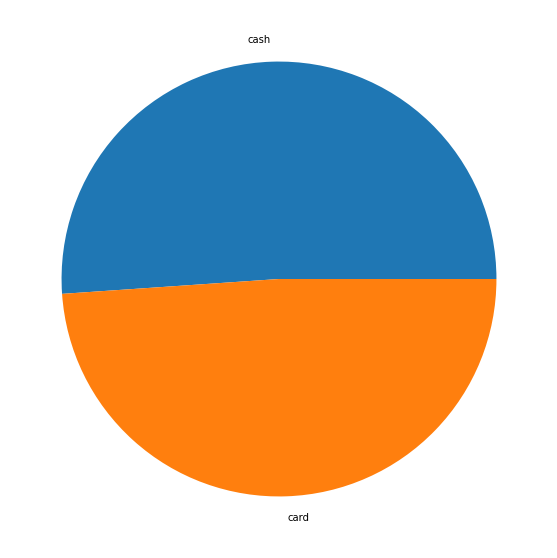

In [ ]:
cursor.close()
connection.close()